In [2]:
import torch
import torch.nn.functional as F
import sys
try: # whether we're on titanic or not work on my regression_classif branch at least.
    sys.path.append("/home/mathieu/local/py_script/dnadna")
    import net as net_module
except ModuleNotFoundError:
    #sys.path.append("/home/jean/Documents/ML_genetics/dnadna/")
    #import net as net_module
    print("import fail")
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
dfparam = pd.read_csv('/media/mathieu/crucialmx300/exp/BacterialDemoSelection_param', sep="\t", header=0)
def compute_expected_class(scenario_name):
    expected_class = 1
    model_init = dfparam.at[int(scenario_name[23:28]),'model_init']
    demo=""
    if 'Bottleneck' in model_init :
        expected_class = 0
        demo = "Bot"
    if 'Constant' in model_init :
        expected_class = 1
        demo="Cst"
    if 'Expansion' in model_init :
        expected_class = 2
        demo="Exp"
    #selection = dfparam.at[int(scenario_name[24:29]),'selection']
    return expected_class, demo

CNN

In [7]:
# TP / (TP + FN)
# Proportion of the simulations with "bottleneck" predicted as such
def recall_bottle(grp):
    return sum((grp.expected_class == 0) & (grp.observed_class==0)) / (sum(grp.expected_class == 0)+1)
def recall_cst(grp):
    return sum((grp.expected_class == 1) & (grp.observed_class==1)) / (sum(grp.expected_class == 1)+1)
def recall_expan(grp):
    return sum((grp.expected_class == 2) & (grp.observed_class==2)) / (sum(grp.expected_class == 2)+1)

In [126]:
cnnori = pd.read_csv("/media/mathieu/crucialmx300/skyline/log/finalcsv/predcnnori.csv", sep=",", header=0)

In [127]:
dforiginal = cnnori
df_rb = dforiginal[dforiginal["expected_class"]==0].groupby(["scenario"]).apply(recall_bottle).to_frame("recall").reset_index()
df_rb['demo']='Bot'
df_re = dforiginal[dforiginal["expected_class"]==2].groupby(["scenario"]).apply(recall_expan).to_frame("recall").reset_index()
df_re['demo']='Exp'
df_rc = dforiginal[dforiginal["expected_class"]==1].groupby(["scenario"]).apply(recall_cst).to_frame("recall").reset_index()
df_rc['demo']='Cst'
df_recall_tot_ori = pd.concat([df_rb, df_rc,df_re],axis=0)
df_recall_tot_ori = df_recall_tot_ori.reset_index()


In [128]:
df_recall_tot_ori["coeff_sel"]=0
for i in df_recall_tot_ori.index.to_list() :
    scenar = int(df_recall_tot_ori.loc[i,"scenario"][9:14])
    coeff_sel = dfparam.loc[scenar,"coeff_sel"]
    #print(scenar)
    df_recall_tot_ori.loc[i,"coeff_sel"]= coeff_sel

Text(0.5, 1.0, 'original')

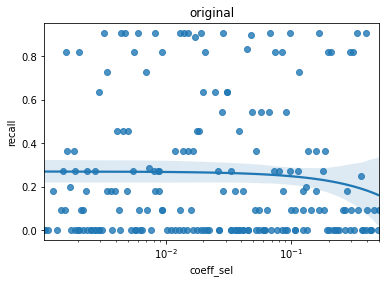

In [132]:
g = sns.regplot(data = df_recall_tot_ori, x="coeff_sel",y="recall")
g.set_xscale('log')
g.set_title('original')

In [135]:
df_recall_tot_ori=df_recall_tot_ori.dropna()
from scipy import stats
stats.spearm.set_title('lalala')anr(df_recall_tot_ori["coeff_sel"], df_recall_tot_ori["recall"])

SpearmanrResult(correlation=-0.02830713638719832, pvalue=0.6921979053790164)

In [143]:
cnndom = pd.read_csv("/media/mathieu/crucialmx300/skyline/log/finalcsv/predcnndom.csv")

In [144]:
dforiginal = cnndom
df_rb = dforiginal[dforiginal["expected_class"]==0].groupby(["scenario"]).apply(recall_bottle).to_frame("recall").reset_index()
df_rb['demo']='Bot'
df_re = dforiginal[dforiginal["expected_class"]==2].groupby(["scenario"]).apply(recall_expan).to_frame("recall").reset_index()
df_re['demo']='Exp'
df_rc = dforiginal[dforiginal["expected_class"]==1].groupby(["scenario"]).apply(recall_cst).to_frame("recall").reset_index()
df_rc['demo']='Cst'
df_recall_tot_ori = pd.concat([df_rb, df_rc,df_re],axis=0)
df_recall_tot_ori = df_recall_tot_ori.reset_index()


In [145]:
df_recall_tot_ori["coeff_sel"]=0
for i in df_recall_tot_ori.index.to_list() :
    scenar = int(df_recall_tot_ori.loc[i,"scenario"][9:14])
    coeff_sel = dfparam.loc[scenar,"coeff_sel"]
    #print(scenar)
    df_recall_tot_ori.loc[i,"coeff_sel"]= coeff_sel

Text(0.5, 1.0, 'damage')

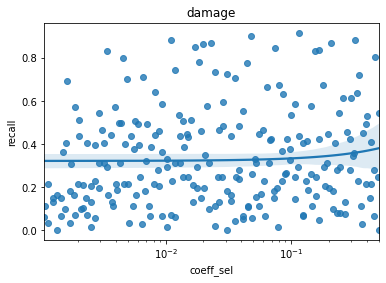

In [146]:
g = sns.regplot(data = df_recall_tot_ori, x="coeff_sel",y="recall")
g.set_xscale('log')
g.set_title('damage')

In [147]:
df_recall_tot_ori=df_recall_tot_ori.dropna()
stats.spearmanr(df_recall_tot_ori["coeff_sel"], df_recall_tot_ori["recall"])

SpearmanrResult(correlation=0.13825740107710124, pvalue=0.03227528499787008)

no correlation with recall and selection rate for undamaged data

but correlation for damaged data


better recall for scenario with high selection rate after damage

less damage occurs in scenarios with high selection rate ?